In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df= pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


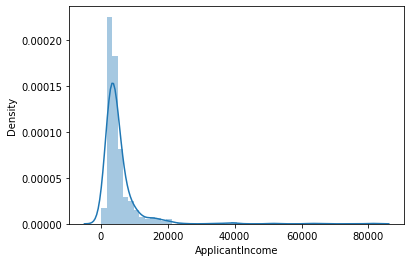

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


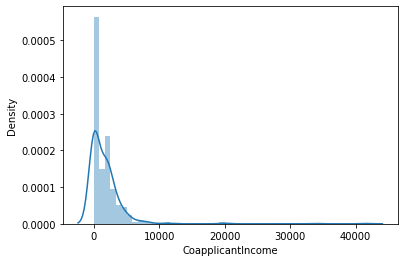

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


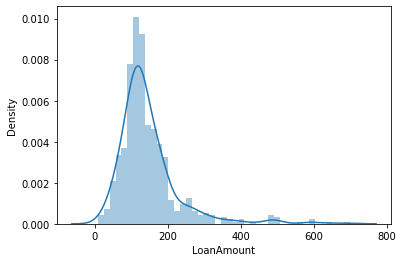

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


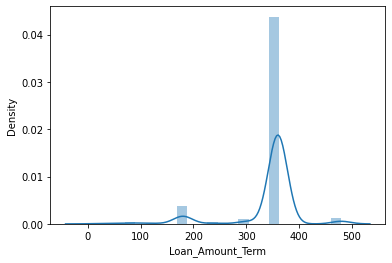

In [ ]:
numerical=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for x in numerical:
  sns.distplot(df[x])
  plt.show()

# How to handle these skewed data?
## Transformation
In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square rootof x or the logarithm of x. In a stronger sense, a transformation is a replacement that changes the shape of a distribution or relationship.Steps to do transformation
1. Draw a graph(histogram and density plot) of the data to see how far patterns in data match the simplestideal patterns.
2. check the range the data. BecauseTransformations will have little effect if the range issmall.
3. check the skewness by statistical methods(decide right and leftskewness).
4. apply the methods (explained in detail below)to handle the skewness based on the skewedvalues.

# Reasons for using transformations
### There are many reasons for transformation.
#### 1. Convenience

#### 2. Reducing skewness

#### 3. Equal spreads

#### 4. Linear relationships

##### 1. Convenience: A transformed scale may be as natural as the original scale and more convenient for aspecific
purpose. for example- percentage rather than the original data.

##### 2. Reducing skewness: A transformation may be used to reduce skewness. A distribution that is symmetric or
nearly so is often easier to handle and interpret than a skewed distribution.

- To handle the right skewness, we use:
- logarithms (best for it)
- roots[square root and cube root] (good)
- reciprocals (weak)
- To handle left skewness, we use:
- squares
- cubes
- higher powers.

##### 3. Equal spreads: A transformation may be used to produce approximately equal spreads, despite marked
variations in level, which again makes data easier to handle and interpret. Each data set or subset having about
the same spread or variability is a condition called homoscedasticity and it's opposite is called heteroscedasticity

##### 4. Linear relationships: When looking at relationships between variables, it is often far easier to think about
patterns that are approximately linear than about patterns that are highly curved. This is vitally important when using
linear regression, which amounts to fitting such patterns to data

## To Handle Right Skewedness
### 1.logTransformation
The log transformation is widely used in research to deal with skewed data. It is the best method to handle the right skewed data.

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# skewness before transformation
df.ApplicantIncome.skew()

6.539513113994625

In [ ]:
# After transformation
np.log(df.ApplicantIncome).skew()

0.4795799780016222

In [ ]:
# let's see the changes
pd.DataFrame({'Actual':df.ApplicantIncome.values, 'Transformed':np.log(df.ApplicantIncome)})

,Actual,Transformed
0,5849,8.674026
1,4583,8.430109
2,3000,8.006368
3,2583,7.856707
4,6000,8.699515
...,...,...
609,2900,7.972466
610,4106,8.320205
611,8072,8.996157
612,7583,8.933664


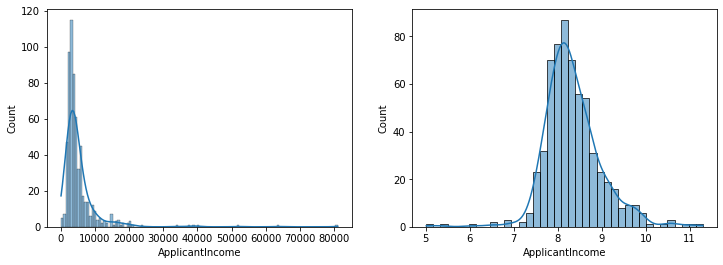

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
sns.histplot(ax=ax[0], kde=True,x=df.ApplicantIncome, label='Actual')
sns.histplot(ax=ax[1], kde=True,x=np.log(df.ApplicantIncome), label='Transformed')

**Let's look at CoapplicantIncome column**

In [ ]:
df.CoapplicantIncome.skew()

7.491531216657306

In [ ]:
# after transformation
np.log(df.CoapplicantIncome).skew()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

Here we get skewness value as NaN after transformation because this feature contains 0 values.

If feature has 0 values, we can go for other transformations.

## Graph of log & log doesn't treat "0" values

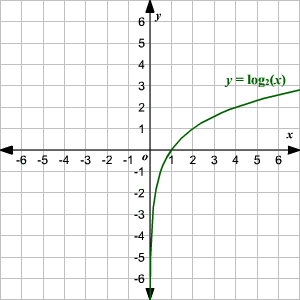

## 2.RootTransformation
### 2.1 Square rootTransfomation
The square root means x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape. it is weaker than the logarithm and the cube root.

It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values. 

In [ ]:
# skewness before transformation
df.CoapplicantIncome.skew()

7.491531216657306

In [ ]:
# After transformation
np.sqrt(df.CoapplicantIncome).skew()

0.9795605436152078

In [ ]:
# let's see the changes
pd.DataFrame({'Actual':df.CoapplicantIncome.values, 'Transformed':np.sqrt(df.CoapplicantIncome)})

,Actual,Transformed
0,0.0,0.000000
1,1508.0,38.832976
2,0.0,0.000000
3,2358.0,48.559242
4,0.0,0.000000
...,...,...
609,0.0,0.000000
610,0.0,0.000000
611,240.0,15.491933
612,0.0,0.000000


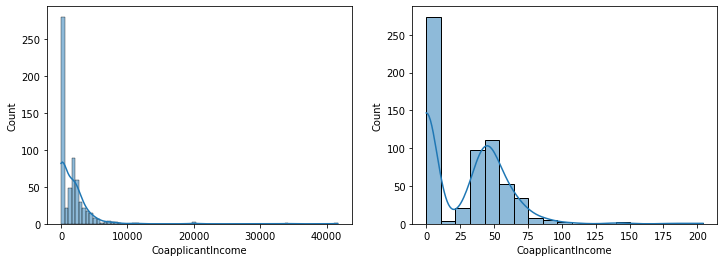

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
sns.histplot(ax=ax[0], kde=True, x=df.CoapplicantIncome, label='Actual')
sns.histplot(ax=ax[1], kde=True, x=np.sqrt(df.CoapplicantIncome), label='Transformed')

### 2.2 cube rootTransformation
The cube root means x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape,

It is weaker than the logarithm but stronger than the square root transformation.

It is also used for reducing right skewness, and has the advantage that it can be applied to zero and negative values.

In [ ]:
# skewness before transformation
df.CoapplicantIncome.skew()

7.491531216657306

In [ ]:
# After transformation
np.cbrt(df.CoapplicantIncome).skew()

0.19672586559954772

In [ ]:
# let's see the changes
pd.DataFrame({'Actual':df.CoapplicantIncome.values, 'Transformed':np.cbrt(df.CoapplicantIncome)})

,Actual,Transformed
0,0.0,0.000000
1,1508.0,11.467457
2,0.0,0.000000
3,2358.0,13.310098
4,0.0,0.000000
...,...,...
609,0.0,0.000000
610,0.0,0.000000
611,240.0,6.214465
612,0.0,0.000000


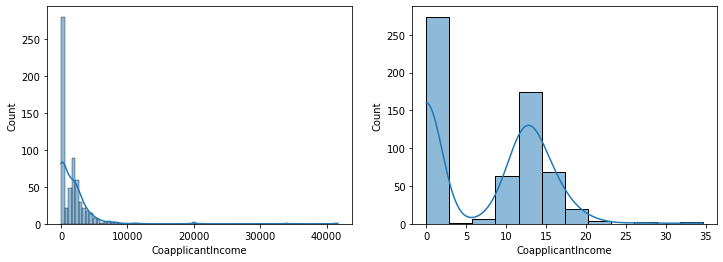

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
sns.histplot(ax=ax[0], kde=True, x=df.CoapplicantIncome, label='Actual')
sns.histplot(ax=ax[1], kde=True, x=np.cbrt(df.CoapplicantIncome), label='Transformed')

*Here we can see the skewness have reduced from 0.9 to 0.19 and the graph looks more normal compared to SQRT transformation*

**Both the LOG and ROOT tranforms can only be applied if values are +ve and 0(root trans only). But what if there are -ve values??**

### 3.ReciprocalsTransformation
The reciprocal, x to 1/x, with its sibling the negative reciprocal, x to -1/x, is a very strong transformation with a drastic effect on distribution shape.

It cannot be applied to zero values. Although it can be applied to negative values.

In [ ]:
df.ApplicantIncome.dtype

dtype('int64')

*We need to change the data type from int to float because if we apply reciprocal transformation on int values, then they are gonna rounded off to 0.*

In [ ]:
# skewness before transformation
df.ApplicantIncome.skew()

6.539513113994625

In [ ]:
# After transformation
np.reciprocal(df.ApplicantIncome.astype('float64')).skew()

12.54078650732894

In [ ]:
# let's see the changes
pd.DataFrame({'Actual':df.ApplicantIncome.values, 'Transformed':np.reciprocal(df.ApplicantIncome.astype('float'))})

,Actual,Transformed
0,5849,0.000171
1,4583,0.000218
2,3000,0.000333
3,2583,0.000387
4,6000,0.000167
...,...,...
609,2900,0.000345
610,4106,0.000244
611,8072,0.000124
612,7583,0.000132


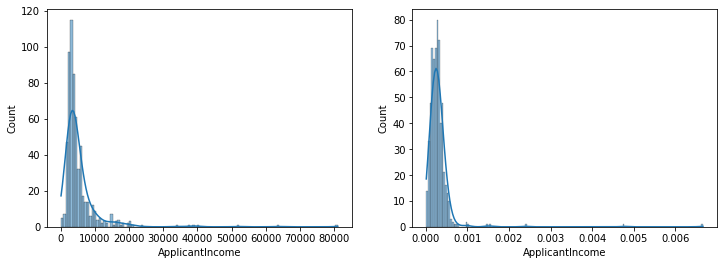

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
sns.histplot(ax=ax[0], kde=True,x=df.ApplicantIncome, label='Actual')
sns.histplot(ax=ax[1], kde=True,x=np.reciprocal(df.ApplicantIncome.astype('float')), label='Transformed')

Here we can see the skewness value increasing. So, reciprocal transformation is not good for this feature.

# To Handle Left skewness
## 1. SquaresTransformation
The square, x to x^2, has a moderate effect on distribution shape and it could be used to reduce left skewness.

Squaring usually makes sense only if the variable concerned is zero or positive, given that (-x)^2 and x^2 are identical.

In [ ]:
# skewness before transformation
df.Loan_Amount_Term.skew()

-2.362414124216269

In [ ]:
# After transformation
np.square(df.Loan_Amount_Term).skew()

-1.1561608900310019

In [ ]:
# let's see the changes
pd.DataFrame({'Actual':df.Loan_Amount_Term.values, 'Transformed':np.square(df.Loan_Amount_Term)})

,Actual,Transformed
0,360.0,129600.0
1,360.0,129600.0
2,360.0,129600.0
3,360.0,129600.0
4,360.0,129600.0
...,...,...
609,360.0,129600.0
610,180.0,32400.0
611,360.0,129600.0
612,360.0,129600.0


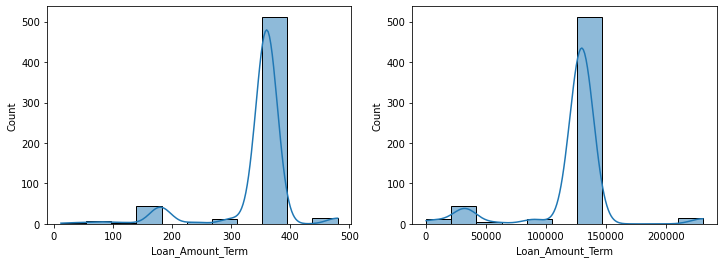

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
sns.histplot(ax=ax[0], kde=True, x=df.Loan_Amount_Term, label='Actual')
sns.histplot(ax=ax[1], kde=True, x=np.square(df.Loan_Amount_Term), label='Transformed')

Here we can see the skewness reduced -2.3 to -1.1.

## 2.CubesTransformation
The cube, x to x³, has a better effect on distribution shape than squaring and it could be used to reduce left skewness.

In [ ]:
# skewness before transformation
df.Loan_Amount_Term.skew()

-2.362414124216269

In [ ]:
# After transformation
np.power(df.Loan_Amount_Term,3).skew()

0.3663404404179868

In [ ]:
# let's see the changes
pd.DataFrame({'Actual':df.Loan_Amount_Term.values, 'Transformed':np.power(df.Loan_Amount_Term,3)})

,Actual,Transformed
0,360.0,46656000.0
1,360.0,46656000.0
2,360.0,46656000.0
3,360.0,46656000.0
4,360.0,46656000.0
...,...,...
609,360.0,46656000.0
610,180.0,5832000.0
611,360.0,46656000.0
612,360.0,46656000.0


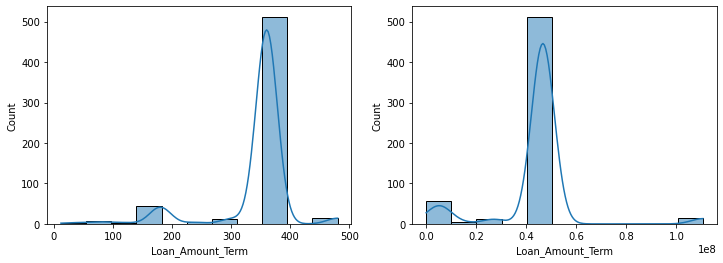

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
sns.histplot(ax=ax[0], kde=True, x=df.Loan_Amount_Term, label='Actual')
sns.histplot(ax=ax[1], kde=True, x=np.power(df.Loan_Amount_Term,3), label='Transformed')

Here we can see, the skewness have become positive with a magnitude of 0.3 only.

## 3.Higher powers 
When simple transformation like square and cubes doesn’t reduce the skewness in the data distribution, we can use higherpowers to transform to data. It is only useful in left skewness.

In [ ]:
# skewness before transformation
df.Loan_Amount_Term.skew()

-2.362414124216269

In [ ]:
# After transformation
np.power(df.Loan_Amount_Term,4).skew()

2.081972190285452

But, here we can see the skewness is increasing with increasing the powers. So, here we can go for CUBE transform.

But if at any case, the skewness (left) do not reduce much, then we can go for higher powers.